### 가로형 막대 그래프
- 각 변수 사이 값의 크기 차이를 설명하는데 적합 
- plot() 메소드의 kind = 'barh' 옵션 입력

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc 
font_path = 'C:\\Users\\jswoo\\Desktop\\Repository\\Study_Data_Science\\Pandas_Data_Analytics\\Part04\\malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family = font_name)

path = 'C:\\Users\\jswoo\\Desktop\\Repository\\Study_Data_Science\\Pandas_Data_Analytics\\Part04\\시도별 전출입 인구수.xlsx'
df = pd.read_excel(path, header =0, engine='openpyxl')

df = df.fillna(method='ffill')

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace =True)
df_seoul.set_index('전입지', inplace=True)

sr_one = df_seoul.loc['경기도']

plt.style.use('ggplot')

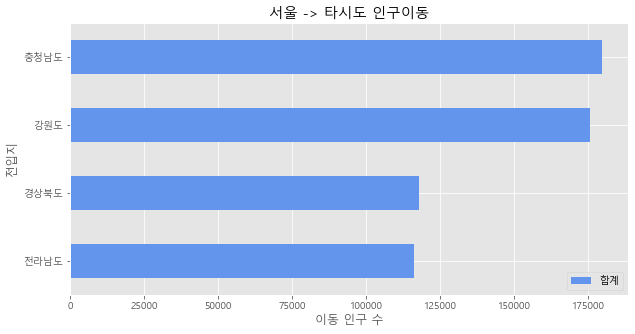

In [2]:
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]
df_4['합계'] = df_4.sum(axis = 1)

df_total = df_4[['합계']].sort_values(by = '합계', ascending =True)

df_total.plot(kind = 'barh', color = 'cornflowerblue', width = 0.5, figsize = (10, 5))

plt.title('서울 -> 타시도 인구이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

plt.show()